In [40]:
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pmdarima as pm



In [8]:
# https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [5]:
# https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [2]:
train = pd.read_csv("train.csv")

In [5]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['period_begin', 'period_end', 'period_duration', 'region_type',
       'region_type_id', 'table_id', 'is_seasonally_adjusted', 'region',
       'city', 'state', 'state_code', 'property_type', 'property_type_id',
       'median_sale_price', 'median_sale_price_mom', 'median_sale_price_yoy',
       'median_list_price', 'median_list_price_mom', 'median_list_price_yoy',
       'median_ppsf', 'median_ppsf_mom', 'median_ppsf_yoy', 'median_list_ppsf',
       'median_list_ppsf_mom', 'median_list_ppsf_yoy', 'homes_sold',
       'homes_sold_mom', 'homes_sold_yoy', 'pending_sales',
       'pending_sales_mom', 'pending_sales_yoy', 'new_listings',
       'new_listings_mom', 'new_listings_yoy', 'inventory', 'inventory_mom',
       'inventory_yoy', 'months_of_supply', 'months_of_supply_mom',
       'months_of_supply_yoy', 'median_dom', 'median_dom_mom',
       'median_dom_yoy', 'avg_sale_to_list', 'avg_sale_to_list_mom',
       'avg_sale_to_list_yoy', 'sold

In [23]:
# df[df['state'] =='NC'].region.unique()
df['state'].str.contains('North Ca').sum()
# select Durham county in NC
durham_nc = df[((df['state'].str.contains('North Ca')) &( df['region'].str.contains('Durham')))]

In [120]:
durham_nc.period_begin.nunique()
# 132 dates
durham_nc[durham_nc.period_begin=='12/1/2019'].homes_sold

497324    127.0
674417    329.0
694916    489.0
750381     26.0
791994      7.0
Name: homes_sold, dtype: float64

In [29]:
durham_nc.period_begin.head()

198818    1/1/2016
246931    2/1/2013
248475    9/1/2016
253763    8/1/2018
264010    7/1/2017
Name: period_begin, dtype: object

In [32]:

durham_nc['date'] = pd.to_datetime(durham_nc['period_begin'])

C:\Users\zodia\AppData\Local\Temp\ipykernel_14912\50379323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durham_nc['date'] = pd.to_datetime(durham_nc['period_begin'])


In [37]:
durham_nc.sort_values('date').tail()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,date
756500,12/1/2022,12/31/2022,30,county,5,2038,f,"Durham County, NC",NaN,North Carolina,...,0.267516,-0.142919,0.122397,0.215116,-0.004884,-0.050117,"Durham, NC",20500.0,1/15/2023 14:45,2022-12-01
665883,12/1/2022,12/31/2022,30,county,5,2038,f,"Durham County, NC",NaN,North Carolina,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,"Durham, NC",20500.0,1/15/2023 14:45,2022-12-01
496061,12/1/2022,12/31/2022,30,county,5,2038,f,"Durham County, NC",NaN,North Carolina,...,0.335938,-0.118608,0.282996,0.156863,0.027233,-0.348292,"Durham, NC",20500.0,1/15/2023 14:45,2022-12-01
757257,12/1/2022,12/31/2022,30,county,5,2038,f,"Durham County, NC",NaN,North Carolina,...,0.275200,-0.133712,0.173796,0.206897,0.012240,-0.114622,"Durham, NC",20500.0,1/15/2023 14:45,2022-12-01
607004,12/1/2022,12/31/2022,30,county,5,2038,f,"Durham County, NC",NaN,North Carolina,...,0.136364,0.003030,0.124459,0.375000,0.375000,0.108333,"Durham, NC",20500.0,1/15/2023 14:45,2022-12-01


In [38]:
durham_nc.property_type.unique()

array(['Multi-Family (2-4 Unit)', 'All Residential', 'Condo/Co-op',
       'Townhouse', 'Single Family Residential'], dtype=object)

In [104]:
durham_condos = durham_nc[durham_nc['property_type'] == 'Condo/Co-op' ][['date', 'median_sale_price', 'homes_sold']]

In [105]:
durham_condos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 253763 to 794762
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               132 non-null    datetime64[ns]
 1   median_sale_price  132 non-null    float64       
 2   homes_sold         132 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.1 KB


In [106]:
durham_condos = durham_condos.sort_values('date')

In [107]:
durham_condos.date.tail()

674886   2022-08-01
790449   2022-09-01
707542   2022-10-01
611205   2022-11-01
607004   2022-12-01
Name: date, dtype: datetime64[ns]

In [108]:
durham_condos=durham_condos.set_index('date')# set date as the index. 


,median_sale_price,homes_sold
date,,
2012-01-01,165000.0,3.0
2012-02-01,105000.0,9.0
2012-03-01,153450.0,8.0
2012-04-01,139900.0,6.0
2012-05-01,137450.0,14.0


<AxesSubplot:xlabel='date', ylabel='median_sale_price'>

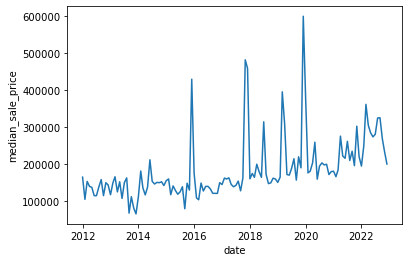

In [114]:
sns.lineplot(data = durham_condos, x='date', y='median_sale_price')


<AxesSubplot:xlabel='date', ylabel='homes_sold'>

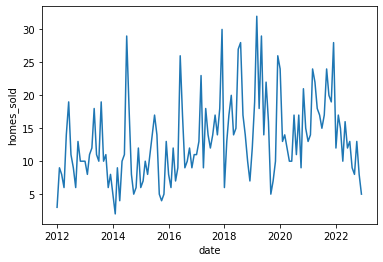

In [112]:
sns.lineplot(data = durham_condos, x='date', y='homes_sold')


In [115]:
# what months are the ones with the big spikes?
durham_condos[durham_condos.median_sale_price > 300000]

,median_sale_price,homes_sold
date,,
2015-12-01,430000.0,13.0
2017-11-01,482500.0,18.0
2017-12-01,459336.5,30.0
2018-07-01,314728.0,27.0
2019-03-01,395841.5,32.0
2019-04-01,308500.0,18.0
2019-12-01,600390.0,26.0
2020-01-01,378208.5,24.0
2021-11-01,302900.0,19.0


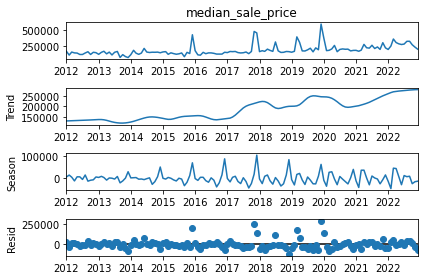

In [125]:
# do decomposition
stl = STL(durham_condos.median_sale_price, seasonal=13, period=12)
res = stl.fit()
fig = res.plot()

There is trend. and Seasonality. 
split into train/valid. 6 months each. 

In [149]:
valid = durham_condos.tail(12)
valid = valid[ :-6]
test = durham_condos.tail(6)
train = durham_condos[:-12]

In [150]:
# take seasonal differences
train['diff_data']=train.median_sale_price.diff(12) 

C:\Users\zodia\AppData\Local\Temp\ipykernel_14912\844228511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['diff_data']=train.median_sale_price.diff(12)


In [151]:
# drop the first 12 months now - which have no differences. 
# train[:12]
train=train.tail(-12)

Results of Dickey-Fuller Test:
Test Statistic                -6.552821e+00
p-value                        8.764328e-09
#Lags Used                     1.100000e+01
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64


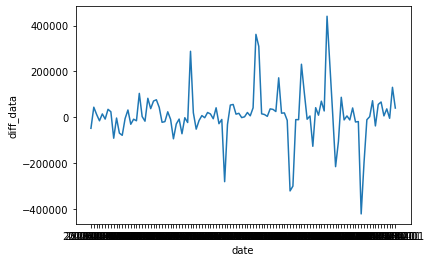

In [6]:
# do you have stationarity
sns.lineplot(data = train, x='date', y='diff_data')
# https://www.redfin.com/news/data-center/
# null hypothesis is The series has a unit root.(aka the series is NOT stationary.)
# this p value is small - you reject the null. you have some pattern left. 

adf_test(train.diff_data)

In [9]:
# kpss test
# Null Hypothesis: The process is trend stationary. # fail to reject. 
kpss_test(train.diff_data)

Results of KPSS Test:
Test Statistic           0.04299
p-value                  0.10000
Lags Used                3.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


C:\Users\zodia\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


C:\Users\zodia\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


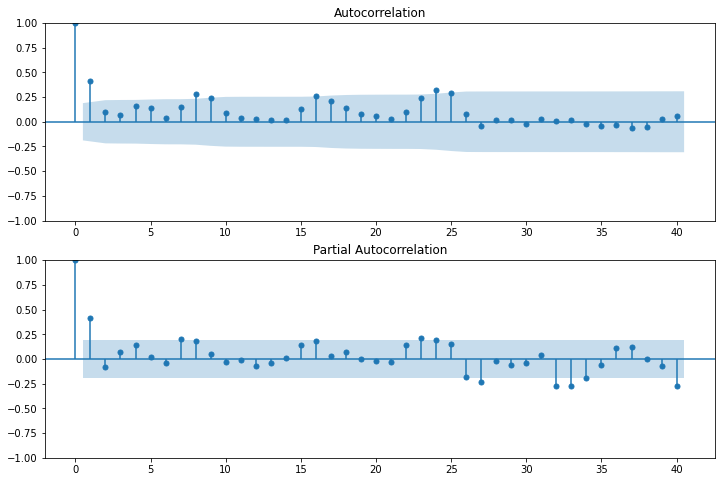

In [11]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['median_sale_price'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['median_sale_price'], lags=40, ax=ax2)



C:\Users\zodia\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


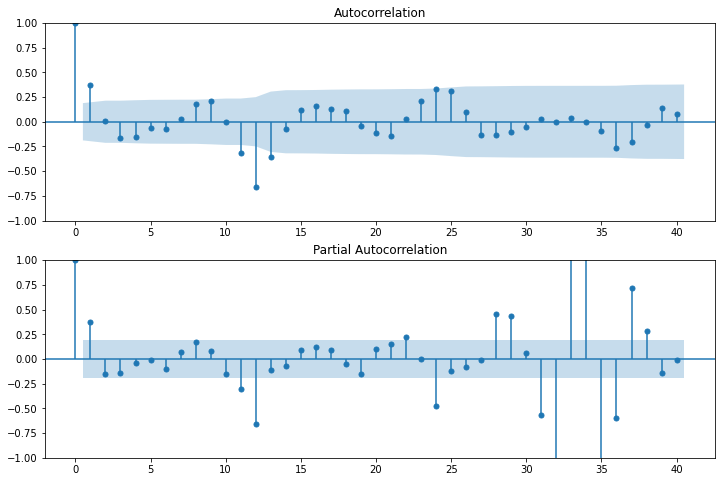

In [15]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['diff_data'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['diff_data'], lags=40, ax=ax2)



In [33]:
model = pm.auto_arima(train['diff_data'], seasonal=False)
model

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [34]:
model3 = pm.auto_arima(train['diff_data'], seasonal=True, m=12)
model3

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [67]:
model2 = pm.auto_arima(train['median_sale_price'], seasonal=True, m=12, trace=True)
model2

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2713.359, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2747.337, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2745.413, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2745.354, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2715.254, Time=1.93 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2714.888, Time=1.77 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2716.701, Time=0.39 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=2710.577, T

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

In [143]:
valid=pd.read_csv("valid.csv")
valid.shape[0]

6

In [193]:
forecasts2 = model2.predict(valid.shape[0]) # does this fit into exisiting data or future?
preds, conf_int = model2.predict(n_periods=valid.shape[0], return_conf_int=True)


In [194]:
forecasts2

array([229083.0002216 , 251196.95521007, 239287.04886074, 236392.96502854,
       251149.27462108, 249444.26508786])

In [146]:
mod4 = sm.tsa.statespace.SARIMAX(train['median_sale_price'], order=(2,1,1), seasonal_order=(1,0,1,12))
results=mod4.fit()
forecasts4=results.forecast(valid.shape[0]) # sarimax does not have get forecast and uses predict for in sample

In [147]:
res = mod4.fit(disp=False)
print(res.summary())
# null hypothesis for ljung-box is that you have no-autocorrelations. this is a fine ljung-box score. 

                                     SARIMAX Results                                      
Dep. Variable:                  median_sale_price   No. Observations:                  108
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1351.919
Date:                            Sun, 12 Feb 2023   AIC                           2715.839
Time:                                    11:05:27   BIC                           2731.876
Sample:                                         0   HQIC                          2722.340
                                            - 108                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3456      0.167      2.069      0.039       0.018       0.673
ar.L2         -0.1747      0.195   

ShapiroResult(statistic=0.6932204365730286, pvalue=1.0419397007514763e-13)

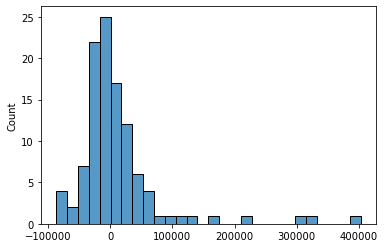

In [64]:
# the residuals are supposed to normal. 
sns.histplot(res.resid)
stats.shapiro(res.resid) # null is that the residuals are normal. 

In [151]:
v_tmp

,index,f2,f4
0,108,229083.000222,203360.932442
1,109,251196.955210,213048.344016
2,110,239287.048861,223184.838131
3,111,236392.965029,225265.657530
4,112,251149.274621,220831.761421
5,113,249444.265088,217926.837017


In [154]:
v_tmp = pd.DataFrame({ 'f2': forecasts2, 'f4': forecasts4}).reset_index(

,date,median_sale_price,homes_sold,index,f2,f4
0,2022-01-01,194950.0,12.0,108,229083.000222,203360.932442
1,2022-02-01,250000.0,17.0,109,251196.955210,213048.344016
2,2022-03-01,362000.0,15.0,110,239287.048861,223184.838131
3,2022-04-01,305250.0,10.0,111,236392.965029,225265.657530
4,2022-05-01,285000.0,16.0,112,251149.274621,220831.761421


<AxesSubplot:>

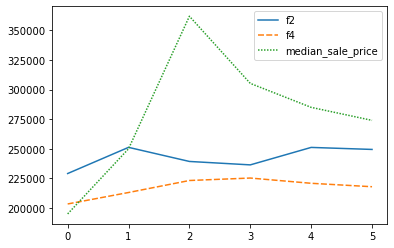

In [97]:
# f3 is on differences. f1 clearly bad. 
sns.lineplot(data=v[['f2', 'f4', 'median_sale_price']])

In [105]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
#mean_absolute_percentage_error(y_true, y_pred)

In [157]:
 #sklearn.metrics.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')[source]¶
print("mae = ", mean_absolute_error(valid['median_sale_price'], v_tmp.f2), 
      mean_absolute_error(valid['median_sale_price'], v_tmp.f4))
print("mape = ",mean_absolute_percentage_error(valid['median_sale_price'], v_tmp.f2), 
      mean_absolute_percentage_error(valid['median_sale_price'], v_tmp.f4))

mae =  47551.066972242224 64067.249054524815
mape =  0.1588049353254663 0.2110408723129851


In [130]:
train.date.iloc[-1]

'2021-12-01'

In [134]:
fitted=results.predict(0,108)
t = pd.concat((train,fitted), join='inner',axis=1 )
t.head()

,date,median_sale_price,homes_sold,diff_data,predicted_mean
0,2013-01-01,117400.0,10.0,-47600.0,0.000000
1,2013-02-01,149320.0,8.0,44320.0,89513.506740
2,2013-03-01,166000.0,11.0,12550.0,100258.585668
3,2013-04-01,125000.0,12.0,-14900.0,117282.301739
4,2013-05-01,152500.0,18.0,15050.0,101798.177550


<AxesSubplot:>

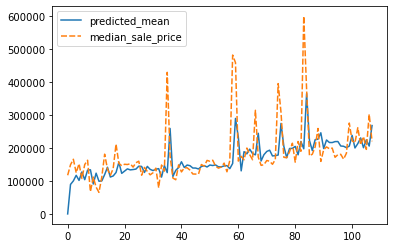

In [139]:
sns.lineplot(data=t[['predicted_mean', 'median_sale_price']])

In [140]:
test = pd.read_csv("test.csv")

In [180]:
# combine valid and train and fit the autoarima and sarimax and make predictions
comb = train.copy()
comb.drop(['diff_data', 'homes_sold'], inplace=True, axis=1)
# valid.drop('homes_sold', inplace=True, axis=1)
comb = pd.concat([comb, valid], axis=0)



In [181]:
comb = comb.set_index('date')

In [182]:
comb.head()

,median_sale_price
date,
2013-01-01,117400.0
2013-02-01,149320.0
2013-03-01,166000.0
2013-04-01,125000.0
2013-05-01,152500.0


In [183]:
# fit the autoarima and make predictions
model_aa = pm.auto_arima(comb['median_sale_price'], seasonal=True, m=12, trace=True)
forecast_aa = model_aa.predict(test.shape[0])


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2863.761, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2897.601, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2895.789, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2873.042, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2895.633, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2870.392, Time=0.22 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2869.436, Time=0.30 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2865.754, Time=0.86 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2870.218, Time=0.67 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=4.30 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=2

In [184]:
model_sax = sm.tsa.statespace.SARIMAX(comb['median_sale_price'], order=(2,1,1), seasonal_order=(1,0,1,12))
results_sax=model_sax.fit()
forecast_sax=results_sax.forecast(test.shape[0]) # sarimax does not have get forecast and uses predict for in sample

C:\Users\zodia\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\zodia\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [185]:
print("mae = ", mean_absolute_error(test['median_sale_price'], forecast_aa), 
      mean_absolute_error(test['median_sale_price'], forecast_sax))
print("mape = ",mean_absolute_percentage_error(test['median_sale_price'], forecast_aa), 
      mean_absolute_percentage_error(test['median_sale_price'], forecast_sax))

mae =  28295.026028318123 50099.380101976625
mape =  0.10058554063451143 0.18130890953184065


In [191]:
forecast_saxout=results_sax.forecast(12) 
forecast_aaout = model_aa.predict(12)


In [188]:
forecast_aaout

array([269412.37656995, 265083.81233189, 274998.29163653, 271012.23053198,
       252256.7218121 , 227245.68436421, 266762.43631608, 276899.51878952,
       284095.90203711, 286845.72522995, 277726.21799755, 281207.68054102])